# Drug Classification - Comparison of Machine Learning Models
Katlyn Goeujon-Mackness
06/05/2026

## Introduction
# Drug Classification - Comparison of Machine Learning Models

## Introduction

Imagine you are a medical researcher collecting data for a study. You have collected data on a group of patients, all with the same disease.

During their treatment, each patient responded to one of five medications:
* Drug A
* Drug B
* Drug C
* Drug X
* Drug Y

Part of your job is to build a model to determine which medication might be appropriate for a future patient with the same disease.

In this project, we explore different machine learning algorithms to predict the most suitable drug for a patient based on various health indicators. Using classification techniques, we analyze how factors such as age, blood pressure, cholesterol levels, and sodium-to-potassium ratio influence drug recommendations.

### Objectives:
- Implement and compare multiple **classification models**.
- Evaluate **performance metrics** to determine the most effective approach.
- Utilize **data visualization** to interpret patterns in drug prescriptions.

Through this analysis, we aim to optimize drug selection and provide **data-driven insights** into medication recommendations.

### Classification Algorithms
We will explore the following classification algorithms:
- Logistic Regression
- Decision Trees
- Random Forest Classifer
- K-Nearest Neighbors
- AdaBoost and Gradient Boost Classifiers

### Project Structure

1. Data Exploration
   - Loading the dataset
   - Understanding data structure
   - Handling missing values

2. Data Preprocessing
   - Encoding categorical variables
   - Feature scaling and transformation
   - Splitting dataset into train/test sets

3. Exploratory Data Analysis (EDA)
   - Visualizing distributions (histograms, box plots)
   - Correlation analysis
   - Insights from data

4. Model Selection & Training
   - Choosing classification models (e.g., Logistic Regression, Decision Trees, Random Forests)
   - Implementing machine learning algorithms
   - Performance evaluation metrics

5. Model Comparison
   - Comparing accuracy, precision, recall, and F1-score
   - Hyperparameter tuning (Grid Search, Random Search)
   - Feature importance analysis

6. Conclusion
   - Best-performing model summary
   - Potential improvements
   - Future applications of drug classification

## Data Exploration
To begin the analysis, we will load and explore the dataset to understand its structure and handle missing values.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
drugs = pd.read_csv("data/drugs.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Column Descriptions
- **Age**: Age of patient (numeric)
- **Sex**: Sex of patient (F/M)
- **BP**: Blood pressure of patient (LOW/NORMAL/HIGH)
- **Cholesterol**: Cholesterol of patient (HIGH/NORMAL)
- **Na_to_K**: Sodium to potassium level of patient (numeric)
- **Drug**: Drug actually prescribed by the doctor (A, B, C are domestic; X, Y are international)

In [3]:
# Show summary statistics
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
# Display basic information including missing values
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Comments
- No values are missing from the dataset. 
- Numerical features have the appropriate type. 
- Categorical data must be codified for analysis.

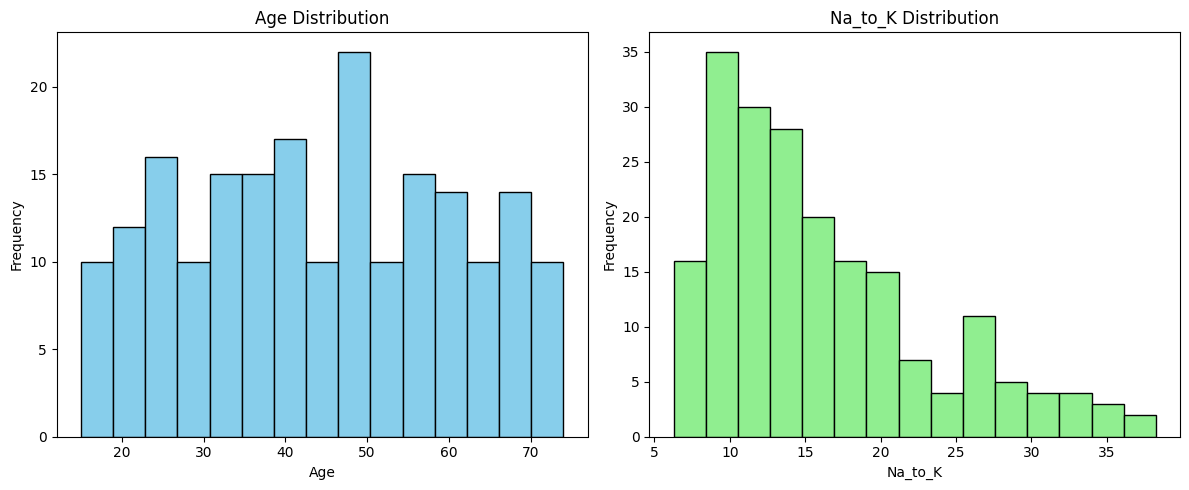

In [5]:
# Distribution of Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Age distribution
axes[0].hist(drugs['Age'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot Na_to_K distribution
axes[1].hist(drugs['Na_to_K'], bins=15, color='lightgreen', edgecolor='black')
axes[1].set_title('Na_to_K Distribution')
axes[1].set_xlabel('Na_to_K')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

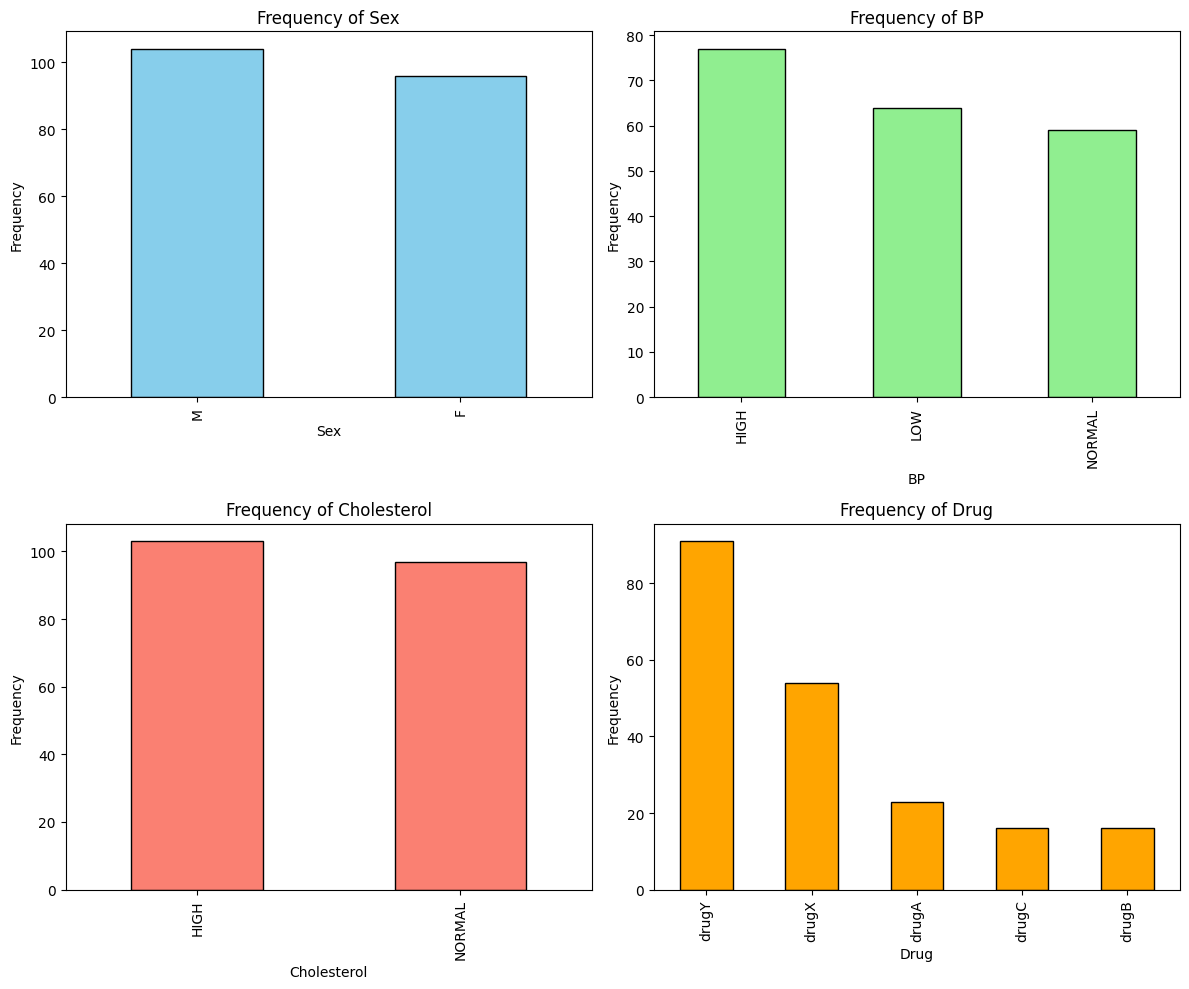

In [6]:
# Distribution of Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Sex
drugs['Sex'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Frequency of Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Frequency')

# Plot for BP
drugs['BP'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Frequency of BP')
axes[0, 1].set_xlabel('BP')
axes[0, 1].set_ylabel('Frequency')

# Plot for Cholesterol
drugs['Cholesterol'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Frequency of Cholesterol')
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_ylabel('Frequency')

# Plot for Drug
drugs['Drug'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_title('Frequency of Drug')
axes[1, 1].set_xlabel('Drug')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

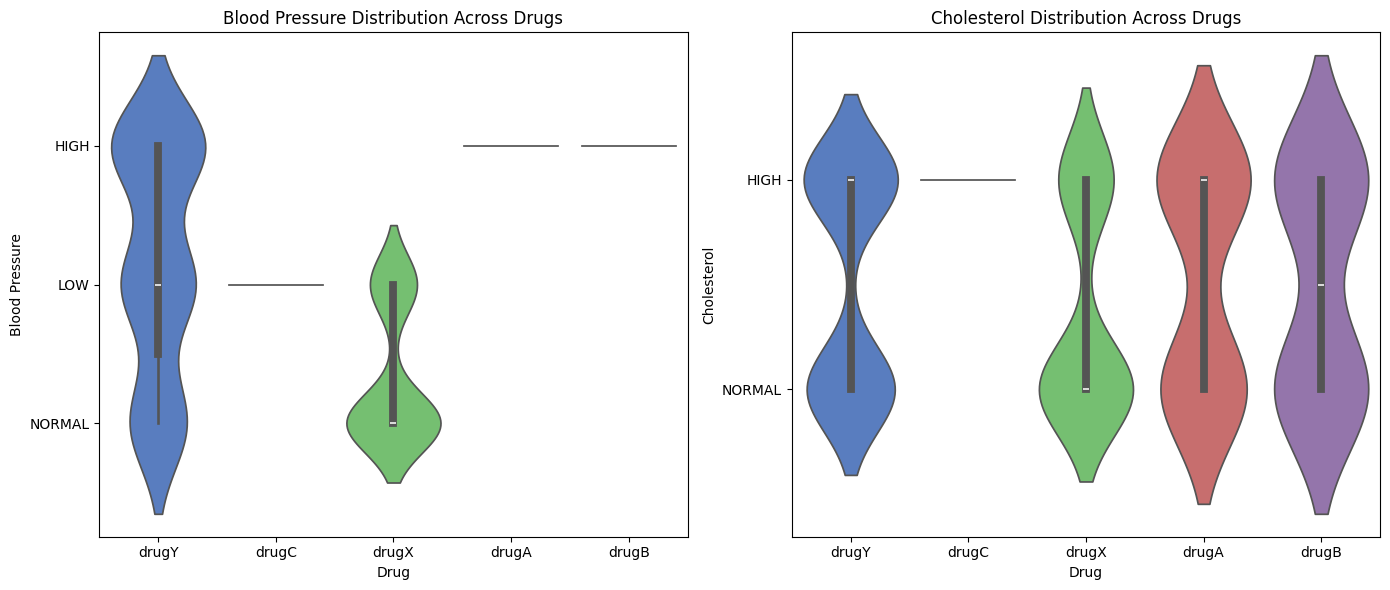

In [7]:
# Violin plots comparing the distribution of Blood Pressure and Cholesterol across different drugs
# Set the figure size
plt.figure(figsize=(14, 6))

# Create a subplot for Blood Pressure vs Drug
plt.subplot(1, 2, 1)
sns.violinplot(x='Drug', y='BP', data=drugs, palette='muted', scale='count')
plt.title('Blood Pressure Distribution Across Drugs')
plt.xlabel('Drug')
plt.ylabel('Blood Pressure')

# Create a subplot for Cholesterol vs Drug
plt.subplot(1, 2, 2)
sns.violinplot(x='Drug', y='Cholesterol', data=drugs, palette='muted', scale='count')
plt.title('Cholesterol Distribution Across Drugs')
plt.xlabel('Drug')
plt.ylabel('Cholesterol')

plt.tight_layout()
plt.show()

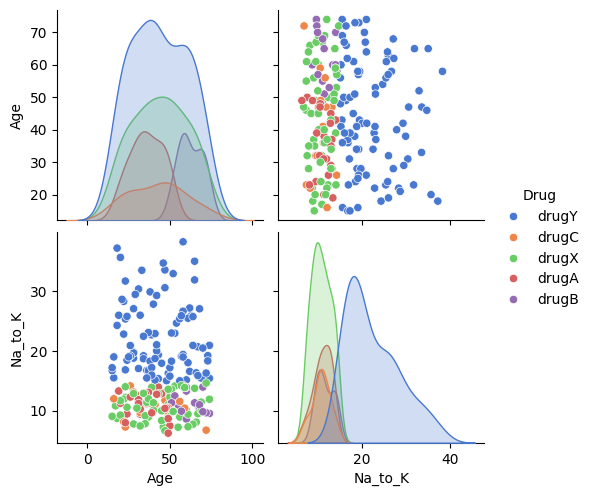

In [8]:
# Visualize distributions and correlations between drugs
sns.pairplot(drugs, hue='Drug', diag_kind='kde', palette='muted')
plt.show()

## Data Preprocessing
Now that we understand the structure of the data, some processing needs to be undertaken to prepare the data for modeling. This includes:
- Encoding categorical variables
- Feature scaling and transformation
- Splitting dataset into train/test sets

In [9]:
# Set the feature columns and target variable (y)
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = drugs.drop("Drug", axis=1)
y = drugs['Drug']

In [10]:
# Encoding categorical variables
# Convert categories into numbers using label encoding
labels = {}
numerical_features = ["Age", "Na_to_K"]
categorical_features = ["Sex", "BP", "Cholesterol"]

for feature in categorical_features:
    le = LabelEncoder()
    drugs[feature] = le.fit_transform(drugs[feature])
    # Store encoder for later
    labels[feature] = le

# Update X with the transformed values
X = drugs[feature_cols].values

In [11]:
# Preview X to make sure it looks good
X[:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [12]:
# Feature scaling
# Standardize Na_to_K to ensure consistent modeling
scaler = StandardScaler()
X[:, 4] = scaler.fit_transform(X[:, 4].reshape(-1, 1)).flatten()

In [13]:
# Divide dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Selection & Training
- Choosing classification models (e.g., Logistic Regression, Decision Trees, Random Forests)
- Implementing machine learning algorithms
- Performance evaluation metrics

### Logistic Regression
The first model to look at is logistic regression. Within this model, we can use a solver algorithm to optimize its parameters. Here, we train various logistic regression solvers and evaluate them to find which one performs the best for our classification task.

In [14]:
# Create a function to compare the solvers and find the best one for the data
def model_optimizer(solvers):
    """Compares multiple solvers and selects the best one based on accuracy"""
    
    results = []

    for solver in solvers:
        # Initialize and train the model
        model = LogisticRegression(solver=solver)
        model.fit(X_train, y_train)

        # Predict class labels on test data
        y_pred = model.predict(X_test)

        # Test the accuracy of the prediciont
        accuracy = accuracy_score(y_test, y_pred)
        classification = classification_report(y_test, y_pred)
    
        results.append({
            "Solver": solver,
            "Accuracy": accuracy,
            "Classification": classification,
            "Model": model # Stores trained model
        })

    # Find the best solver
    best_model = max(results, key=lambda x: x["Accuracy"])

    # Print results
    print(f"Best solver: {best_model["Solver"]}")
    print(f"Best accuracy: {best_model["Accuracy"]}")
    print(best_model["Classification"])

    return best_model["Model"]
    
solvers = ["sag", "lbfgs", "liblinear", "saga", "newton-cg"]
regression_model = model_optimizer(solvers)

Best solver: lbfgs
Best accuracy: 0.9
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       0.50      1.00      0.67         2
       drugC       1.00      0.50      0.67         4
       drugX       0.87      1.00      0.93        13
       drugY       1.00      0.88      0.94        17

    accuracy                           0.90        40
   macro avg       0.87      0.88      0.84        40
weighted avg       0.93      0.90      0.90        40



### Decision Trees
Decision trees are a useful tool in classification problems that organizes data in a hierarchical format. Here, we compare two different decision tree criteria (Gini and Entropy) to select the best model.

In [15]:
clf_gini = 

SyntaxError: invalid syntax (2538213705.py, line 1)

## Model Comparison
- Comparing accuracy, precision, recall, and F1-score
- Hyperparameter tuning (Grid Search, Random Search)
- Feature importance analysis

In [ ]:
# Store models and their results in a dictionary
models = {
    'Logistic Regression': regression_model
}

## Conclusion
- Best-performing model summary
- Potential improvements
- Future applications of drug classification